# Olfactory control experiments

There is a concern that mice might be able to orient themself on the arnea because of smell coming from the home base. To control for this, we set up an experiment in which we test mice on trials with experimentaly altered air flow. A fan was turned on above the arena so that the air moved down directly to the arena. This should make it impossible to locate the home base using smell.

In [1]:
import pandas as pd
import numpy as np
import os.path
from autopipy.project import Project
from autopipy.session import Session
from autopipy.session import Session
from autopipy.trial import Trial
projectName="autopi_behavior_2021"
dataPath="/adata/projects/autopi_behavior_2021"
dlcModelPath="/adata/models"
myProject = Project(name=projectName,dataPath=dataPath,dlcModelPath=dlcModelPath)

Project name: autopi_behavior_2021
dataPath: /adata/projects/autopi_behavior_2021
dlcModelPath: /adata/models


In [2]:
fn =  myProject.dataPath+"/results/trialsDF.csv"
df = pd.read_csv(fn)

We have a few `fanSessions` that are listed here. We create a dataframe with only these sessions. We also create a variable called `fan` that is True or False depending on whether the fan was on.

In [3]:
fanSessions = ["mn3246-03032021-1635","mn1173-03032021-1823","mn3246-04032021-1613","mn1173-04032021-1725","mn1173-05032021-1646","mn3246-05032021-1534"]
dfFan = df[df.sessionName.isin(fanSessions)]
dfFan["fan"] = (dfFan.trialNo>=35) & (dfFan.trialNo<=70)

We can now create a figure with the homing to periphery

In [4]:
dfFan.columns[40:80]

Index(['all_mvAngularSpeed', 'all_oriAngularDistance', 'all_oriAngularSpeed',
       'all_medianMVDeviationToTarget', 'all_medianHDDeviationToTarget',
       'searchTotal_length', 'searchTotal_duration',
       'searchTotal_meanVectorLengthPosi',
       'searchTotal_meanVectorDirectionPosi',
       'searchTotal_meanVectorLengthOri', 'searchTotal_meanVectorDirectionOri',
       'searchTotal_meanSpeed', 'searchTotal_mvAngularDistance',
       'searchTotal_mvAngularSpeed', 'searchTotal_oriAngularDistance',
       'searchTotal_oriAngularSpeed', 'searchTotal_medianMVDeviationToTarget',
       'searchTotal_medianHDDeviationToTarget', 'searchArena_length',
       'searchArena_duration', 'searchArena_meanVectorLengthPosi',
       'searchArena_meanVectorDirectionPosi',
       'searchArena_meanVectorLengthOri', 'searchArena_meanVectorDirectionOri',
       'searchArena_meanSpeed', 'searchArena_mvAngularDistance',
       'searchArena_mvAngularSpeed', 'searchArena_oriAngularDistance',
       'searc

Saving to /adata/projects/autopi_behavior_2021/results/air_flow_experiment_figure.pdf



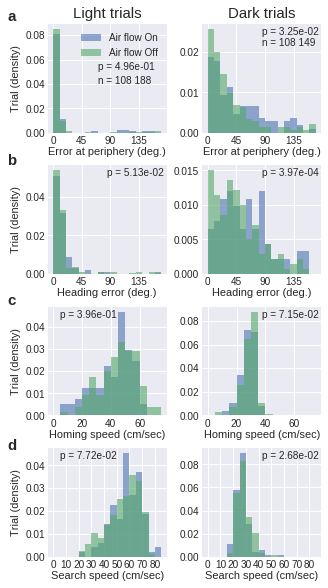

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats


plt.style.use("seaborn")
al=0.6

nRow=4
nCol=2
xPerPlot=2.45
yPerPlot=2.45

fig, axes = plt.subplots(nRow,nCol,figsize=(nCol*xPerPlot,nRow*yPerPlot))
plt.subplots_adjust(wspace=0.3,hspace=0.3)
#fig.tight_layout()

# create a dictionary that hold the variables that varies across graphs
d = {"variable" : ["angularErrorHomingPeri",
                   "homingPeriNoLever_medianMVDeviationToTarget",
                  "homingPeri_meanSpeed",
                  "searchArenaNoLever_meanSpeed"], 
    "xMin" : [0,0,0,0],
     "xMax" : [180,180,80,90],
     "xStep" : [10,10,5,5],
     "xTicksStep" : [45, 45, 20,10],
     "xLabel": ["Error at periphery (deg.)",
               "Heading error (deg.)",
               "Homing speed (cm/sec)",
               "Search speed (cm/sec)"]}

for j, var in enumerate(d["variable"]):
    for i, lc in enumerate(["light","dark"]):
        xi=j%nRow # index for subplot
        yi=i+(j//nRow)*2 # index for subplot

        # get the data 
        dataFanOn = dfFan[var][(dfFan.light==lc) & (dfFan.fan==True)]
        dataFanOff = dfFan[var][(dfFan.light==lc) & (dfFan.fan==False)]
        if xi ==0 :
            axes[xi,yi].set_title("{} trials".format(lc.capitalize()),fontsize=15)
        axes[xi,yi].hist(dataFanOn, 
                       density=True,alpha=al, label = "Air flow On",bins=np.arange(d["xMin"][j],d["xMax"][j],d["xStep"][j]))
        axes[xi,yi].hist(dataFanOff,
                       density=True,alpha=al, label = "Air flow Off",bins=np.arange(d["xMin"][j],d["xMax"][j],d["xStep"][j]))
        axes[xi,yi].set_xlabel(d["xLabel"][j])
        if yi==0:
            axes[xi,yi].set_ylabel("Trial (density)")
        axes[xi,yi].tick_params(axis='both', which='major', pad=3)
        
        axes[xi,yi].xaxis.set_label_coords(0.5, -0.13)
       # axes[xi,yi].yaxis.set_label_coords(-0.25, 0.5)
        axes[xi,yi].set_xticks(np.arange(d["xMin"][j],d["xMax"][j],d["xTicksStep"][j]))
        
        
        
        
        if(i == j == 0):
            axes[xi,yi].legend()  
        stat,p_value = stats.mannwhitneyu(x=dataFanOn, y =dataFanOff )
        if (xi == yi == 0):
            axes[xi,yi].text(0.42,0.58,"p = {:.02e}".format(p_value),transform=axes[xi,yi].transAxes)
            axes[xi,yi].text(0.42,0.45,"n = {} {}".format(len(dataFanOn),len(dataFanOff)),transform=axes[xi,yi].transAxes)
        elif  xi==0 and yi==1:
            axes[xi,yi].text(0.5,0.9,"p = {:.02e}".format(p_value),transform=axes[xi,yi].transAxes)
            axes[xi,yi].text(0.5,0.8,"n = {} {}".format(len(dataFanOn),len(dataFanOff)),transform=axes[xi,yi].transAxes)
        elif xi>1 and yi==0:
            axes[xi,yi].text(0.1,0.9,"p = {:.02e}".format(p_value),transform=axes[xi,yi].transAxes)
        else :
            axes[xi,yi].text(0.5,0.9,"p = {:.02e}".format(p_value),transform=axes[xi,yi].transAxes)
           
axes[0,0].text(0.01,0.885, 'a', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)
axes[0,0].text(0.01,0.68, 'b', style='normal',fontsize=15,  weight="bold",transform=plt.gcf().transFigure)
axes[0,0].text(0.01,0.482, 'c', style='normal',fontsize=15,  weight="bold",transform=plt.gcf().transFigure)
axes[0,0].text(0.01,0.277, 'd', style='normal',fontsize=15,  weight="bold",transform=plt.gcf().transFigure)
        
fileName = myProject.dataPath+"/results/air_flow_experiment_figure.pdf"
print("Saving to " + fileName)
print("")
plt.savefig(fileName,bbox_inches = "tight",dpi=400)

In [6]:
var = "angularErrorHomingPeri"
lc= "dark"
dataFanOn = dfFan[var][(dfFan.light==lc) & (dfFan.fan==True)]
dataFanOff = dfFan[var][(dfFan.light==lc) & (dfFan.fan==False)]

print("Wilcoxon test against 90 degree, fan on")
print("median fan on: {:.2f} degree".format(np.nanmedian(dataFanOn)))
print(stats.wilcoxon(dataFanOn-90))
print("Wilcoxon test against 90 degree, fan off")
print("median fan off: {:.2f} degree".format(np.nanmedian(dataFanOff)))
print(stats.wilcoxon(dataFanOff-90))

var = "homingPeriNoLever_medianMVDeviationToTarget"
lc= "dark"
dataFanOn = dfFan[var][(dfFan.light==lc) & (dfFan.fan==True)]
dataFanOff = dfFan[var][(dfFan.light==lc) & (dfFan.fan==False)]

print("Wilcoxon test against 90 degree, fan on")
print("median fan on: {:.2f} degree".format(np.nanmedian(dataFanOn)))
print(stats.wilcoxon(dataFanOn-90))
print("Wilcoxon test against 90 degree, fan off")
print("median fan off: {:.2f} degree".format(np.nanmedian(dataFanOff)))
print(stats.wilcoxon(dataFanOff-90))




Wilcoxon test against 90 degree, fan on
median fan on: 32.63 degree
WilcoxonResult(statistic=591.0, pvalue=5.627557462858783e-13)
Wilcoxon test against 90 degree, fan off
median fan off: 23.42 degree
WilcoxonResult(statistic=932.0, pvalue=1.118118695230746e-18)
Wilcoxon test against 90 degree, fan on
median fan on: 55.79 degree
WilcoxonResult(statistic=614.0, pvalue=9.420662091721111e-13)
Wilcoxon test against 90 degree, fan off
median fan off: 40.76 degree
WilcoxonResult(statistic=683.0, pvalue=1.4790058713490518e-20)


/home/maryam/anaconda3/envs/DLC-GPU/lib/python3.7/site-packages/scipy/stats/morestats.py:2974: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r)
/home/maryam/anaconda3/envs/DLC-GPU/lib/python3.7/site-packages/scipy/stats/morestats.py:2975: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r)
/home/maryam/anaconda3/envs/DLC-GPU/lib/python3.7/site-packages/scipy/stats/morestats.py:2974: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r)
/home/maryam/anaconda3/envs/DLC-GPU/lib/python3.7/site-packages/scipy/stats/morestats.py:2975: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r)


Saving to /adata/projects/autopi_behavior_2021/results/air_flow_experiment_figure_simple.pdf



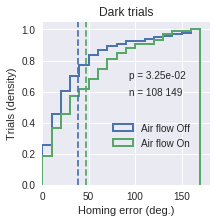

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

plt.style.use("seaborn")
al=0.6

fig, axes = plt.subplots(1,1,figsize=(3,3))
plt.subplots_adjust(wspace=0.4,hspace=0.325)
#fig.tight_layout()

var = "angularErrorHomingPeri"
lc= "dark"
dataFanOn = dfFan[var][(dfFan.light==lc) & (dfFan.fan==True)]
dataFanOff = dfFan[var][(dfFan.light==lc) & (dfFan.fan==False)]

axes.set_title("{} trials".format(lc.capitalize()))
axes.hist(dataFanOff,label = "Air flow Off",bins=np.arange(0,180,10),color= sns.color_palette()[0],
         cumulative=True,density=True,histtype='step',alpha=1.0,lw=2)
axes.hist(dataFanOn,label = "Air flow On",bins=np.arange(0,180,10), color = sns.color_palette()[1],
         cumulative=True,density=True,histtype='step',alpha=1.0,lw=2)
axes.axvline(x=np.nanmean(dataFanOff),color= sns.color_palette()[0],linestyle='dashed')
axes.axvline(x=np.nanmean(dataFanOn),color= sns.color_palette()[1],linestyle='dashed')
axes.set_xlabel("Homing error (deg.)")
axes.set_ylabel("Trials (density)")
axes.set_xlim(0,180)

axes.legend(loc=(0.4,0.2))  
stat,p_value = stats.mannwhitneyu(x=dataFanOn, y =dataFanOff )
axes.text(0.52,0.65,"p = {:.02e}".format(p_value),transform=axes.transAxes)
axes.text(0.52,0.55,"n = {} {}".format(len(dataFanOn),len(dataFanOff)),transform=axes.transAxes)
           
fileName = myProject.dataPath+"/results/air_flow_experiment_figure_simple.pdf"
print("Saving to " + fileName)
print("")
plt.savefig(fileName,bbox_inches = "tight",dpi=400)